In [3]:
from matplotlib import pyplot as plt
import  numpy as np
%matplotlib inline

# Example 2 Multiple minima vs initial guess and advanced fuctions
$g(x)=x^4-4x^2+5$

In [13]:
x_values = np.linspace(-2, 2, 1000)

def g(x):
    return (x**4) - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x 

## Gradient descent as a function

In [22]:
from typing import Union, Tuple
def gradient_desc(
    derivative_func, 
    initial_guess: Union[int, float], 
    learning_rate: Union[int, float], 
    precision: Union[int, float] = 0.0001,
    max_steps: int = 500
    ) -> Tuple[float, list, list]:
    """
    Gradient descent as a function
    @param derivative_func: A derivative function
    @param initial_guess: The initial guess
    @param learning_rate: The step multiplier/learning rate
    @param precision: The precision at which point to break the loop
    @param precision: The maximum allowed steps in the loop
    @return: The minimum for x the derivative, a list of x values in the derivative, and a list of slopes
    """
    new_x = initial_guess
    x_values = [new_x]
    slopes = [derivative_func(new_x)]

    for n in range(max_steps):
        prev_x = new_x
        gradient = derivative_func(prev_x)

        # Stepping down the slope
        new_x = prev_x - (learning_rate * gradient)
        
        # Add our slope and x values into their lists
        x_values.append(new_x)
        slopes.append(derivative_func(new_x))

        step_size = abs(new_x - prev_x)
        if step_size < precision:
            break

    return new_x, x_values, slopes

In [36]:
local_min, list_x, deriv_list = gradient_desc(derivative_func=dg, initial_guess=0, learning_rate=0.02)
print(f"Local Minimum occurs at {local_min}")
print(f"Number of steps {len(list_x)}")


Local Minimum occurs at 0.0
Number of steps 2


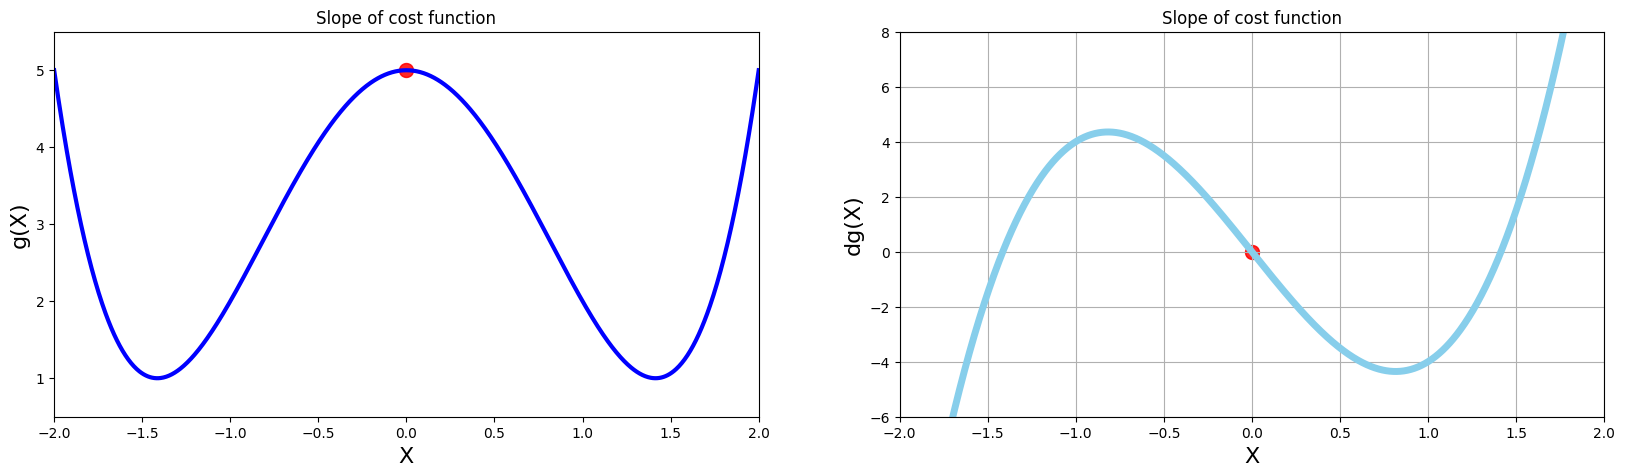

In [37]:
# superimpose gradient descent on Cost function plot and slope of the cost function
plt.figure(figsize=[20,5])


# First chart: Cost function
plt.subplot(1, 2, 1)
plt.title("Slope of cost function")
plt.xlim([-2,2])
plt.ylim([.5, 5.5])
plt.xlabel("X", fontsize=16)
plt.ylabel("g(X)", fontsize=16)
plt.plot(x_values, g(x_values), color="blue", linewidth=3)

plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart of the derivative
plt.subplot(1,2,2)
plt.title("Slope of cost function")
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(X)", fontsize=16)
plt.plot(x_values, dg(x_values), color="skyblue", linewidth=5)

plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)

# Third chart of the gradient descent
# plt.subplot(1,3,3)
# plt.title("Gradient Descent")
# plt.grid()
# plt.xlim([-.55,.2])
# plt.ylim([-.2,.8])
# plt.xlabel("X", fontsize=16)
# plt.ylabel("df(X)", fontsize=16)
# plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)

# plt.scatter(x_values, slopes, color="red", s=100, alpha=0.6)

plt.show()